In [31]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv(r'kyphosis.csv')
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [33]:
data.shape

(81, 4)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [35]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [36]:
##missing?
data.isna().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

C:\Users\roopagupta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

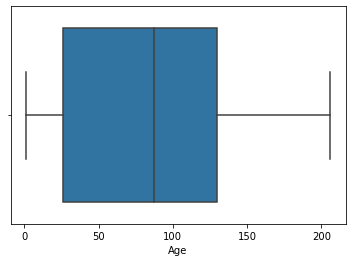

In [37]:
sns.boxplot(data['Age'])


## check distribution of target variable

In [38]:
data['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [39]:
data['Kyphosis'].value_counts(normalize= True)

absent     0.790123
present    0.209877
Name: Kyphosis, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Number'>

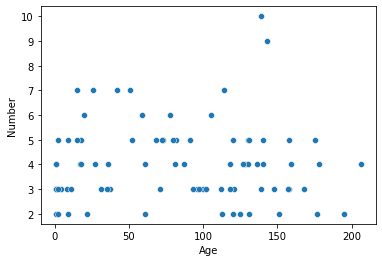

In [40]:
sns.scatterplot( x = 'Age' , y ='Number' , data = data)

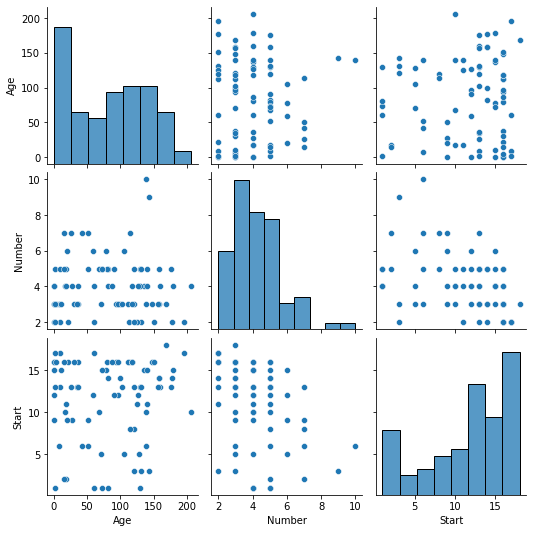

In [41]:
sns.pairplot(data)

<AxesSubplot:xlabel='Kyphosis', ylabel='Age'>

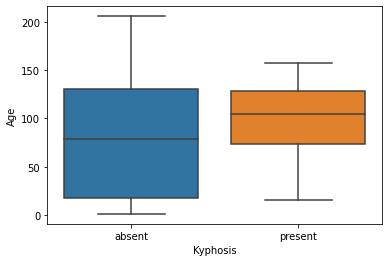

In [42]:
sns.boxplot(x = 'Kyphosis' , y = 'Age' , data = data)

In [43]:
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [44]:
data['Kyphosis'].replace({'absent':0 , 'present' :1} , inplace = True)
data

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [45]:
y = data['Kyphosis']
x = data.drop(columns =['Kyphosis'], axis = 1)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train , x_test , y_train , y_test = train_test_split(x , y, stratify= y ,
                                                       test_size=0.3 , random_state=42)

## ML model:
        1) call the DT algorithm
        2) fit on training data
        3) predict on testing data

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)
pred = dt.predict(x_test)
pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

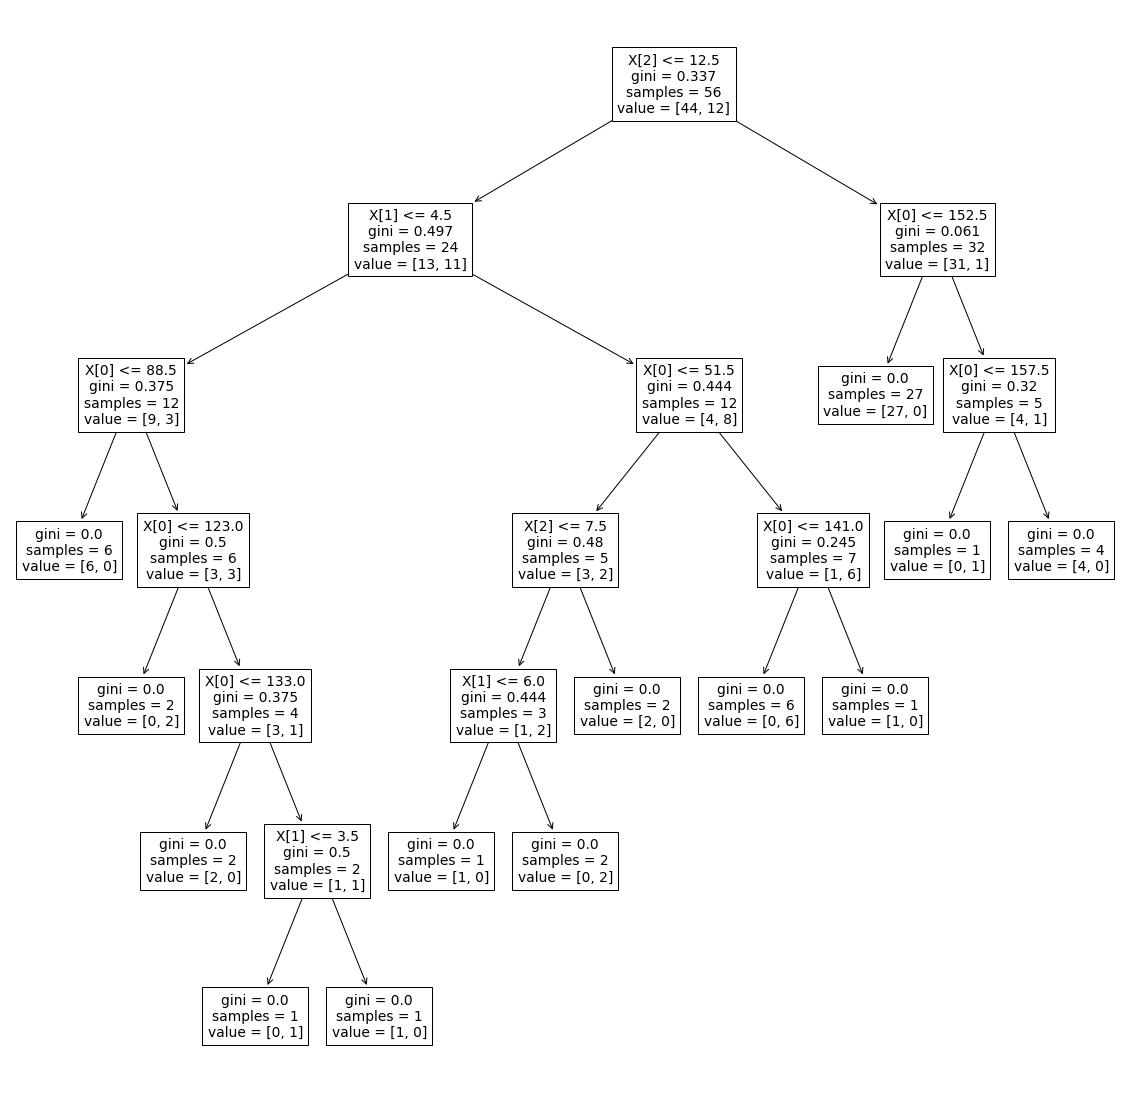

In [50]:
from sklearn import tree

plt.figure(figsize=(20,20))
tree.plot_tree(dt)
plt.show()

In [51]:
## evaluate the ML model

from sklearn.metrics import classification_report



In [52]:
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.50      0.40      0.44         5

    accuracy                           0.80        25
   macro avg       0.68      0.65      0.66        25
weighted avg       0.79      0.80      0.79        25



In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , pred)

array([[18,  2],
       [ 3,  2]], dtype=int64)

## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier()
rf.fit(x_train , y_train)
pred_rf = rf.predict(x_test)
pred_rf

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [57]:
print(classification_report(y_test , pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.40      0.40      0.40         5

    accuracy                           0.76        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.76      0.76      0.76        25



## Hyperparamter tuning in RF
            in order to improve the performance of the model

In [61]:
rf1 = RandomForestClassifier(n_estimators= 5 , max_depth= 3)
rf1.fit(x_train , y_train)
pred_rf1 = rf1.predict(x_test)
pred_rf1
print(classification_report(y_test , pred_rf1))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.50      0.20      0.29         5

    accuracy                           0.80        25
   macro avg       0.66      0.57      0.58        25
weighted avg       0.76      0.80      0.76        25

